In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"D:\Mzakra\Datasets\Salaries.csv")
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# Data Exploration

In [3]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 148654 observations and 13 features in this dataset. 



In [4]:
print(df.shape)
print(df.info())

(148654, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB
None


* There is 4 column with Null ["BasePay","OvertimePay","OtherPay","Benefits"] so we will fixed it below.
* Notes and Status columns has no values in it so we will drop them.
* All Data types seems all right.

In [5]:
# View the Null values

df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [6]:
# Checking for duplicates

df.duplicated().sum()

0

* There is no duplicates

In [7]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [8]:
# Showing the main charactaristics of each column in the dataset
@interact(column = df.columns)
def column_info(column):
    print("*" * 10, column, "*" * 10)
    display(df[column].value_counts())
    print("-" * 30)
    display(df[column].describe())
    print("=" * 40)

interactive(children=(Dropdown(description='column', options=('Id', 'EmployeeName', 'JobTitle', 'BasePay', 'Ov…

* So with these funcrion we can see every value count and describion for the difference columns in the Data.
* There is a -ve values in all the Payment column, which need to fix.
* There is rows with 0 values in BasePay column, Which need to fix.

# Data Cleaning 

### Drop Columns withou Values 

In [9]:
# Drop The columns with No value

df.drop(columns=["Notes","Status"], inplace=True)

### Drop -ve values 

In [10]:
def drop_negative(data):
    numeric_columns = data.select_dtypes("number").columns
    data = data.loc[~(data[numeric_columns] < 0).any(axis=1)]
    return data

df = drop_negative(df)

In [11]:
# Handel 0 in BasePay, TotalPay, TotalPayBenefits

df["BasePay"] = df["BasePay"][df["BasePay"] >1000]
df["TotalPay"] = df["TotalPay"][df["TotalPay"] >1000]
df["TotalPayBenefits"] = df["TotalPayBenefits"][df["TotalPayBenefits"] >1000]

### Handle Null Values

In [12]:
print(round(df['BasePay'].isna().sum() / df.shape[0], 4))

0.0321


* We can drop the missing values in "BasePay" as it's a small % in the data.
* We will handle the missing values in "Benefits" then drop the remaining Null values.
* If we droped the missing values in "Benefits" we will be droping 1/4 of the data so we can't drop it.
* So we can impute it with (Mean, Median, Mode or replace it with 0), so i will go with Mean this time.

In [13]:
# Handle Missing values using mean for Benefits.
df["Benefits"].fillna(df["Benefits"].mean(), inplace = True)

# Drop the remaining Null values
df.dropna(inplace=True)

# Data Visualization

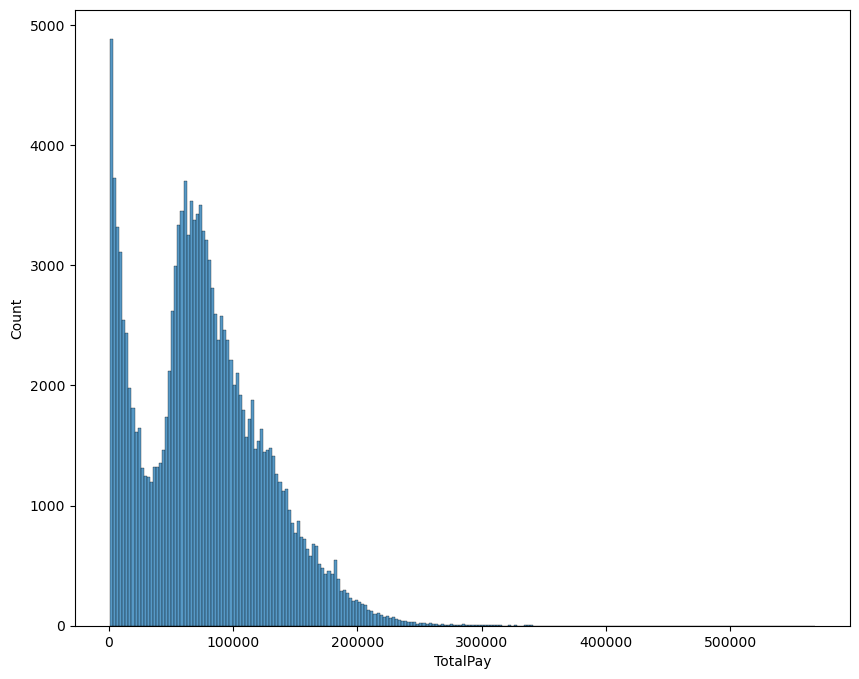

In [14]:
# Check the distribution
plt.figure(figsize=(10, 8))
sns.histplot(x = df["TotalPay"], palette = "magma");

* The Salary is'n a normal distribution, It's a Right Skewed

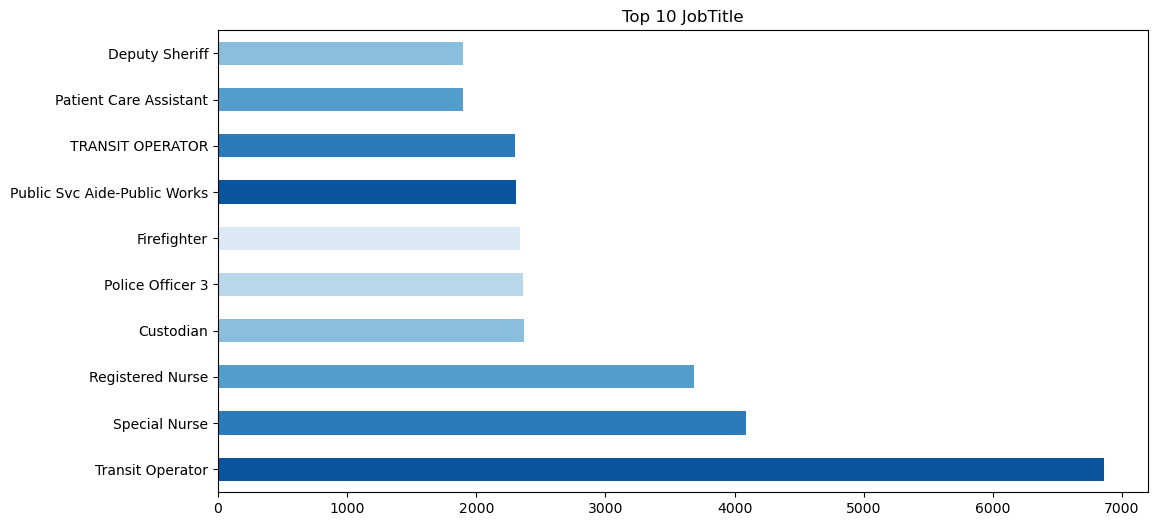

In [15]:
# Top 10 Jop_titles platform

JobTitle_counts = df['JobTitle'].value_counts()
JobTitle_counts[:10].plot(kind = 'barh', color = sns.color_palette("Blues_r"), title = "Top 10 JobTitle", figsize = (12,6));

* Transit Operator is the most frequnty job.

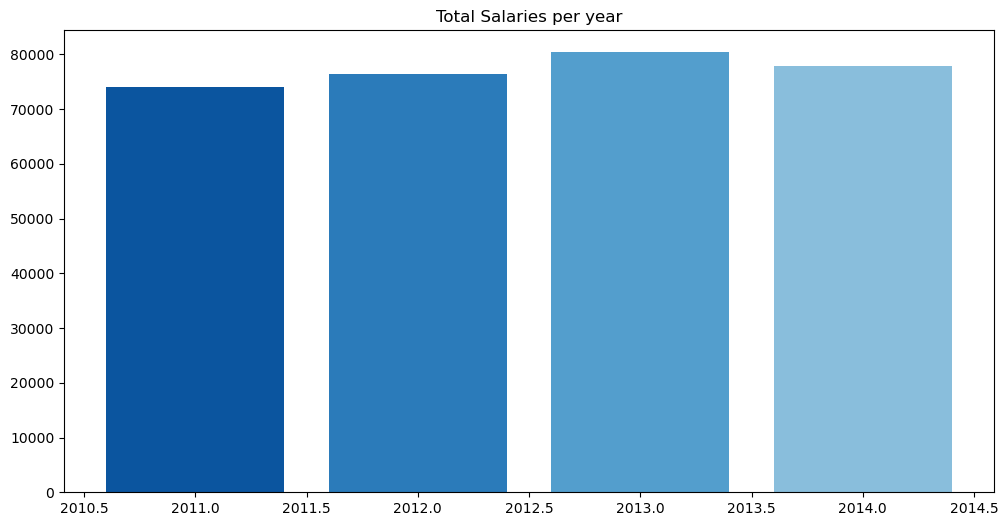

In [16]:
plt.figure(figsize = (12,6))
salaries_rate_year = df.groupby('Year')["TotalPay"].mean().to_frame().reset_index();
plt.bar(salaries_rate_year['Year'],salaries_rate_year['TotalPay'],color=sns.color_palette("Blues_r"));
plt.title("Total Salaries per year");

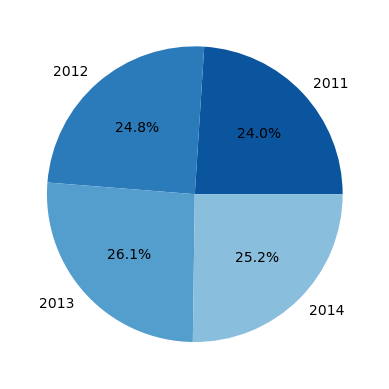

In [17]:
# Same Info put this time with pie chart.

plt.pie(salaries_rate_year['TotalPay'],labels = salaries_rate_year['Year'],autopct = '%.1f%%',colors=sns.color_palette("Blues_r"));

* So 2013 is the golden year for the employees

# Correlation Analysis

In [18]:
df.corr()["TotalPay"]

Id                 -0.202243
BasePay             0.951828
OvertimePay         0.503329
OtherPay            0.480003
Benefits            0.776222
TotalPay            1.000000
TotalPayBenefits    0.975656
Year                0.034301
Name: TotalPay, dtype: float64

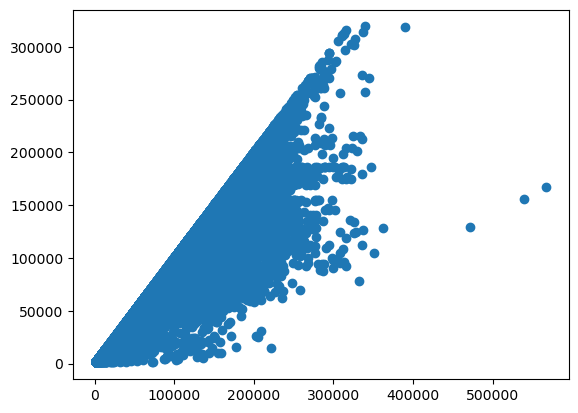

In [19]:
plt.scatter(df['TotalPay'], df['BasePay']);

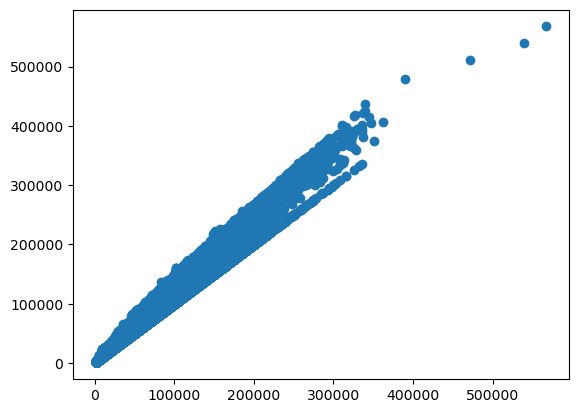

In [20]:
plt.scatter(df['TotalPay'], df['TotalPayBenefits']);

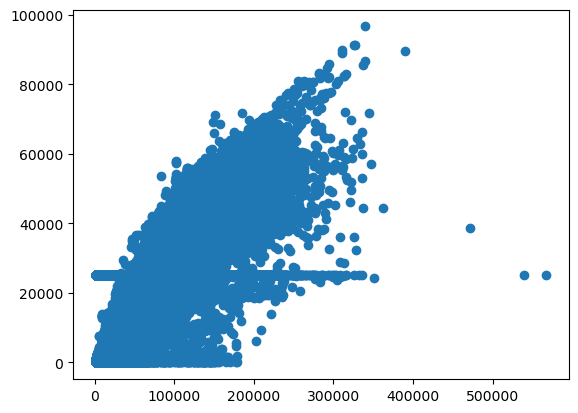

In [21]:
plt.scatter(df['TotalPay'], df['Benefits']);